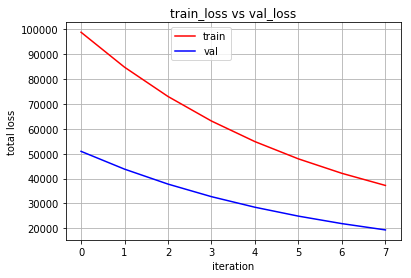

In [2]:
from sklearn import datasets as ds,model_selection as ms
import matplotlib.pyplot as plt

class Lmodel:
    def h_x(x_data,params):
        '''
        f(x)=wx+b
        '''
        total=0.0
        for i in range(len(x_data)):
            total +=x_data[i]*params[i]
        total +=params[len(params)-1]
        return total

    def get_loss(x_data,y_data):
        '''
        calculate loss func 
        '''
        total_loss=0.0
        for i in range(len(y_data)):
            predict_y=Lmodel.h_x(x_data[i].data,model_params)
            temp_loss=((y_data[i]-predict_y)**2)/2
            total_loss+=temp_loss
        return total_loss
    def get_grads(x_data,y_data):
        '''
        calculate gradient func 
        '''
        x_grads=[0.0]*len(x_data[0].data)
        b_grad=0.0
        
        for i in range(len(y_data)):
            for j in range(len(x_grads)):
                x_grads[j]+=(Lmodel.h_x(x_data[i].data,model_params)-y_data[i])*x_data[i].data[j]
            b_grad+=(Lmodel.h_x(x_data[i].data,model_params)-y_data[i])
        
        for i in range(len(x_grads)):
            x_grads[i]/=x_data.shape[0]
        b_grad/=x_data.shape[0]
        return (x_grads,b_grad)
    def update_params(x_grads,b_grad,learning_rate):
        '''
        update params func 
        '''
        for i in range(len(x_grads)):
            model_params[i]+=learning_rate*(-1)*x_grads[i]
        model_params[len(model_params)-1]+=learning_rate*(-1)*b_grad
        #print (model_params)
    def train(iter_num,x_data,y_data,x_data_val,y_data_val,learning_rate):
        '''
        the whole train process
        '''
        train_loss_arr=[]
        val_loss_arr=[]
        for i in range(iter_num):
            train_loss=Lmodel.get_loss(x_data,y_data)
            val_loss=Lmodel.get_loss(x_data_val,y_data_val)
            temp_x_grads,temp_b_grad=Lmodel.get_grads(x_data_val,y_data_val)
            Lmodel.update_params(temp_x_grads,temp_b_grad,learning_rate)

            train_loss_arr.append(train_loss)
            val_loss_arr.append(val_loss)
        Lmodel.draw_pic(train_loss_arr,val_loss_arr,iter_num)
    def draw_pic(train_loss,val_loss,iter_num):
        '''
        draw pic 
        '''
        plt.title('train_loss vs val_loss')  
        plt.xlabel('iteration')  
        plt.ylabel('total loss')  
  
        plt.plot(range(iter_num), train_loss,'r', label='train')  
        plt.plot(range(iter_num), val_loss,'b',label='val')  
        plt.xticks(range(iter_num), rotation=0)  
  
        plt.legend(bbox_to_anchor=[0.3, 1])  
        plt.grid()  
        plt.show()  
    pass
#load data
x,y=ds.load_svmlight_file("./housing_scale.txt")
#seprate data
x_train,x_test,y_train,y_test=ms.train_test_split(x,y,test_size=0.33)
model_params=[0.0]*14
#train
Lmodel.train(8,x_train,y_train,x_test,y_test,0.005)
    


